In [70]:
import torch
import math
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from functools import reduce

percapin = pd.read_csv("../dataset/Percapita-Income - Sheet1.csv",usecols=[1,2])
total = pd.read_csv("../dataset/TotalCases,TotalDeaths,TotalRecovered - Sheet1.csv",usecols=[1,7,9,10,13])
vaccine = pd.read_csv("../dataset/vaccine_data_global.csv",usecols=[0,3,4])
gdp = pd.read_csv("../dataset/WEO_Data.csv", encoding='latin-1',usecols=[0,6])
#print(total.head(5))
#fatality = pd.read_csv("../dataset/04-16-2021.csv")

data_frames = [total,percapin,vaccine,gdp]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                            how='inner'), data_frames)
df_merged['vaccination_rate'] = df_merged['People_fully_vaccinated']/df_merged['Population'].str.replace(',', '').astype(float)              
#print(gdp.head(5))
#print(total.head(5))
#output = pd.merge(percapin,total, on='Country',how='inner')
print(df_merged)
pd.DataFrame.to_csv(df_merged, '../dataset/merged.csv', sep=',', na_rep='.', index=False)


             Country Active\nCases Tot Cases/\n1M pop Deaths/\n1M pop  \
0      United States     6,862,240             95,993           1,732   
1              India     1,200,979              9,728             122   
2             Brazil     1,248,447             63,081           1,653   
3             France     4,650,143             77,367           1,510   
4             Russia       272,895             31,794             705   
..               ...           ...                ...             ...   
141           Bhutan            42              1,180               1   
142         Dominica             6              2,288             NaN   
143          Grenada             2              1,373               9   
144             Fiji             2                 75               2   
145  Solomon Islands             1                 27             NaN   

        Population     US$  People_partially_vaccinated  \
0      332,510,877  68,309                  129494179.0   
1    

In [63]:
df = pd.read_csv("../dataset/CaliforniaVaccination.csv",usecols=[0,7])
df.columns = ["Date", "People Fully vaccinated"]
df.head()

,Date,People Fully vaccinated
0,2021-01-19,260838.0
1,2021-01-20,273276.0
2,2021-01-21,293834.0
3,2021-01-22,321839.0
4,2021-01-23,341731.0


In [64]:
# Convert data into Datetime
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,People Fully vaccinated
0,2021-01-19,260838.0
1,2021-01-20,273276.0
2,2021-01-21,293834.0
3,2021-01-22,321839.0
4,2021-01-23,341731.0


In [65]:
indexDataset = df.set_index('Date')
from datetime import datetime
indexDataset.head()

,People Fully vaccinated
Date,
2021-01-19,260838.0
2021-01-20,273276.0
2021-01-21,293834.0
2021-01-22,321839.0
2021-01-23,341731.0


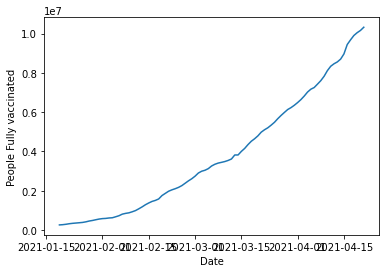

In [68]:
plt.xlabel("Date")
plt.ylabel("People Fully vaccinated")
plt.plot(indexDataset)

In [30]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [33]:
test_result=adfuller(df['People Fully vaccinated'])

In [34]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adfuller_test(df['People Fully vaccinated'])

ADF Test Statistic : 5.3070228002556465
p-value : 1.0
#Lags Used : 3
Number of Observations Used : 89
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [41]:
df['Vaccination First Difference'] = df['People Fully vaccinated'] - df['People Fully vaccinated'].shift(30)

In [42]:
df['People Fully vaccinated'].shift(30)

Date
2021-01-19          NaN
2021-01-20          NaN
2021-01-21          NaN
2021-01-22          NaN
2021-01-23          NaN
                ...    
2021-04-17    4517256.0
2021-04-18    4644718.0
2021-04-19    4792324.0
2021-04-20    4980526.0
2021-04-21    5102480.0
Name: People Fully vaccinated, Length: 93, dtype: float64

In [86]:
indexDataset_log = np.log(indexDataset)

In [87]:
adfuller_test(indexDataset_log)

ADF Test Statistic : -4.3325503974002855
p-value : 0.0003899599910846657
#Lags Used : 3
Number of Observations Used : 89
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

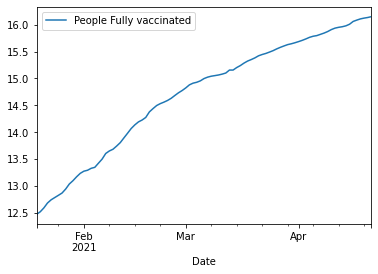

In [88]:
indexDataset_log.plot()